<a href="https://colab.research.google.com/github/dsmohiit/Machine-Learning-Repo/blob/main/Wrapper_Methods_for_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mlxtend

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Exhaustive Feature Selection on Classification Problem

In [ ]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
x = df.iloc[:, :-1]
y = df["species"]

In [ ]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

logistic_reggression = LogisticRegression(max_iter= 1000)

selector = EFS(logistic_reggression, max_features= 4, scoring= "accuracy", cv= 5)

In [ ]:
model = selector.fit(x, y)

Features: 15/15

In [ ]:
model.best_score_

np.float64(0.9733333333333334)

In [ ]:
model.best_feature_names_

('sepal_length', 'sepal_width', 'petal_length', 'petal_width')

In [ ]:
model.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.66666667, 0.73333333, 0.76666667, 0.76666667, 0.83333333]),
  'avg_score': np.float64(0.7533333333333333),
  'feature_names': ('sepal_length',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.53333333, 0.56666667, 0.53333333, 0.53333333, 0.63333333]),
  'avg_score': np.float64(0.5599999999999999),
  'feature_names': ('sepal_width',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.93333333, 1.        , 0.9       , 0.93333333, 1.        ]),
  'avg_score': np.float64(0.9533333333333334),
  'feature_names': ('petal_length',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([1.        , 0.96666667, 0.9       , 0.93333333, 1.        ]),
  'avg_score': np.float64(0.96),
  'feature_names': ('petal_width',)},
 4: {'feature_idx': (0, 1),
  'cv_scores': array([0.73333333, 0.83333333, 0.76666667, 0.86666667, 0.9       ]),
  'avg_score': np.float64(0.8200000000000001),
  'feature_names': ('sepal_length', 'sepal_width')},
 5: {'feature_idx': 

In [ ]:
subset_results = pd.DataFrame.from_dict(model.subsets_).T
subset_results

,feature_idx,cv_scores,avg_score,feature_names
0,"(0,)","[0.6666666666666666, 0.7333333333333333, 0.766...",0.753333,"(sepal_length,)"
1,"(1,)","[0.5333333333333333, 0.5666666666666667, 0.533...",0.56,"(sepal_width,)"
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal_length,)"
3,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal_width,)"
4,"(0, 1)","[0.7333333333333333, 0.8333333333333334, 0.766...",0.82,"(sepal_length, sepal_width)"
5,"(0, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_length, petal_length)"
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,"(sepal_length, petal_width)"
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_width, petal_length)"
8,"(1, 3)","[0.9333333333333333, 0.9666666666666667, 0.9, ...",0.94,"(sepal_width, petal_width)"
9,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal_length, petal_width)"


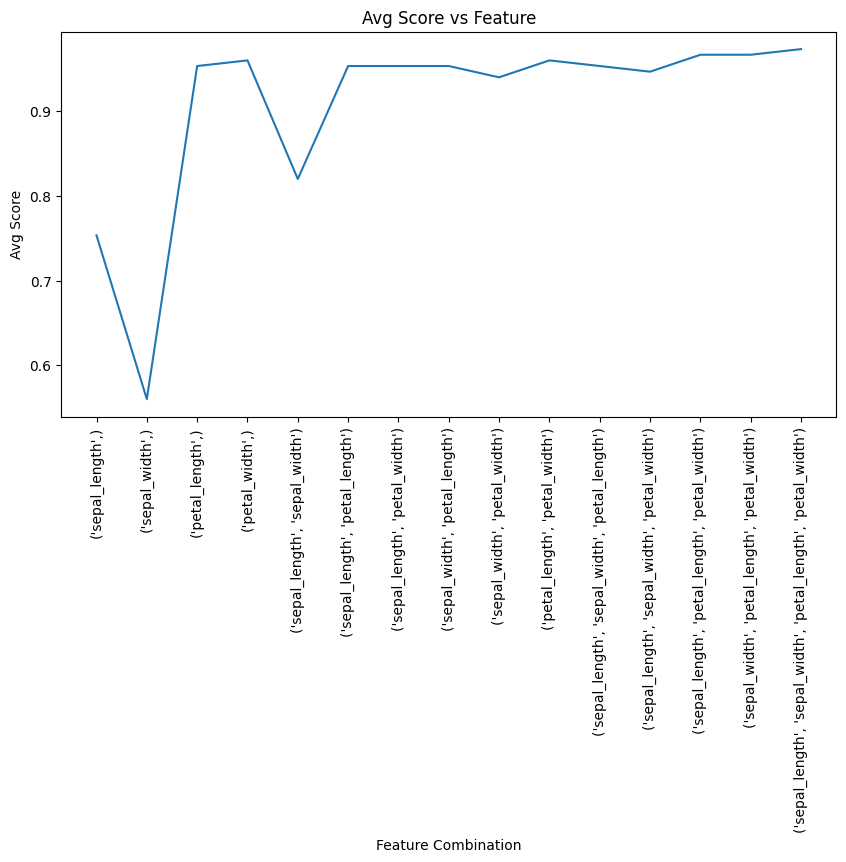

In [ ]:
temp = subset_results[["avg_score", "feature_names"]]


plt.figure(figsize=(10, 5))
plt.plot([str(k) for k in temp["feature_names"]], temp["avg_score"])
plt.title("Avg Score vs Feature")
plt.xticks(rotation= 90)
plt.xlabel("Feature Combination")
plt.ylabel("Avg Score")
plt.show()

#### Exhaustive Feature Selection on Reggression Problem

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
x = df.iloc[:, :-1]
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [ ]:
y = df["medv"]
y

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(404, 13)
(102, 13)


In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
columns = df.columns
x_train_columns = columns[:-1]
x_train_columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [ ]:
columns = df.columns
x_test_columns = columns[:-1]
x_test_columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [ ]:
x_train = pd.DataFrame(x_train, columns=x_train_columns)
x_test = pd.DataFrame(x_test, columns=[x_test_columns])

In [ ]:
x_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


In [ ]:
# Basline model

model = LinearRegression()

print(np.mean(cross_val_score(model, x_train, y_train, scoring= "r2", cv= 5)))
print(np.mean(cross_val_score(model, x_test, y_test, scoring= "r2", cv= 5)))

0.7244357342240262
0.5451790940964928


In [ ]:
# Applying feature selection

model = LinearRegression()

efs = EFS(model, max_features= 13, cv= 10, scoring= "r2", print_progress= True, n_jobs= -1)

selector = efs.fit(x_train, y_train)

Features: 8191/8191

In [ ]:
selector.best_score_

np.float64(0.7021432332186084)

In [ ]:
selector.best_feature_names_

('crim', 'chas', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat')

In [ ]:
subsets = pd.DataFrame.from_dict(selector.subsets_).T
subsets

,feature_idx,cv_scores,avg_score,feature_names
0,"(0,)","[0.06187201349312821, 0.21695752952290714, 0.1...",0.1113,"(crim,)"
1,"(1,)","[-0.06909411223332595, 0.06378364489046906, 0....",0.080141,"(zn,)"
2,"(2,)","[0.2581400495130044, 0.24192652096087108, 0.15...",0.197438,"(indus,)"
3,"(3,)","[-0.06519180407233627, -0.1157077091040255, 0....",0.002908,"(chas,)"
4,"(4,)","[0.18831320204786572, 0.15611671149828166, 0.1...",0.15303,"(nox,)"
...,...,...,...,...
8186,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7903768760758776, 0.7978748201943938, 0.742...",0.698955,"(crim, zn, indus, nox, rm, age, dis, rad, tax,..."
8187,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7793809319729097, 0.7920049721169651, 0.753...",0.699647,"(crim, zn, chas, nox, rm, age, dis, rad, tax, ..."
8188,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7802485152933578, 0.8031632921683025, 0.754...",0.698545,"(crim, indus, chas, nox, rm, age, dis, rad, ta..."
8189,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.78515293060139, 0.7726604948432468, 0.74943...",0.69279,"(zn, indus, chas, nox, rm, age, dis, rad, tax,..."


In [ ]:
subsets["observations"] = 404
subsets["num_features"] = subsets["feature_idx"].apply(lambda x: len(x))

In [ ]:
subsets

,feature_idx,cv_scores,avg_score,feature_names,observations,num_features
0,"(0,)","[0.06187201349312821, 0.21695752952290714, 0.1...",0.1113,"(crim,)",404,1
1,"(1,)","[-0.06909411223332595, 0.06378364489046906, 0....",0.080141,"(zn,)",404,1
2,"(2,)","[0.2581400495130044, 0.24192652096087108, 0.15...",0.197438,"(indus,)",404,1
3,"(3,)","[-0.06519180407233627, -0.1157077091040255, 0....",0.002908,"(chas,)",404,1
4,"(4,)","[0.18831320204786572, 0.15611671149828166, 0.1...",0.15303,"(nox,)",404,1
...,...,...,...,...,...,...
8186,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7903768760758776, 0.7978748201943938, 0.742...",0.698955,"(crim, zn, indus, nox, rm, age, dis, rad, tax,...",404,12
8187,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7793809319729097, 0.7920049721169651, 0.753...",0.699647,"(crim, zn, chas, nox, rm, age, dis, rad, tax, ...",404,12
8188,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7802485152933578, 0.8031632921683025, 0.754...",0.698545,"(crim, indus, chas, nox, rm, age, dis, rad, ta...",404,12
8189,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.78515293060139, 0.7726604948432468, 0.74943...",0.69279,"(zn, indus, chas, nox, rm, age, dis, rad, tax,...",404,12


In [ ]:
def adjust_r2(r2, observations, num_features):
    coef = (observations - 1) / (observations - num_features - 1)
    return 1 - (1 - r2) * coef

In [ ]:
subsets["adjut_r2"] = adjust_r2(subsets["avg_score"], subsets["observations"], subsets["num_features"])

In [ ]:
subsets.sort_values("adjut_r2", ascending= False)

,feature_idx,cv_scores,avg_score,feature_names,observations,num_features,adjut_r2
7590,"(0, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7948781300135751, 0.8126032997049035, 0.740...",0.701604,"(crim, nox, rm, dis, rad, tax, ptratio, b, lstat)",404,9,0.694787
8029,"(0, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7853673828678087, 0.8068527620446221, 0.753...",0.702143,"(crim, chas, nox, rm, dis, rad, tax, ptratio, ...",404,10,0.694564
7975,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7916866437250347, 0.8002117305356404, 0.740...",0.701376,"(crim, zn, nox, rm, dis, rad, tax, ptratio, b,...",404,10,0.693777
8150,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7824493530648428, 0.7949109285480958, 0.753...",0.702035,"(crim, zn, chas, nox, rm, dis, rad, tax, ptrat...",404,11,0.693673
7566,"(0, 3, 4, 5, 7, 8, 10, 11, 12)","[0.7682279280336336, 0.8030267188370754, 0.762...",0.700389,"(crim, chas, nox, rm, dis, rad, ptratio, b, ls...",404,9,0.693545
...,...,...,...,...,...,...,...
1,"(1,)","[-0.06909411223332595, 0.06378364489046906, 0....",0.080141,"(zn,)",404,1,0.077853
30,"(1, 7)","[-0.06763615312808446, 0.06933915753701936, 0....",0.077769,"(zn, dis)",404,2,0.07317
49,"(3, 7)","[-0.050810320515409346, -0.0428493008893589, 0...",0.065037,"(chas, dis)",404,2,0.060374
7,"(7,)","[-0.020714728360076817, 0.06907241897075378, 0...",0.036859,"(dis,)",404,1,0.034463


In [ ]:
x_train_selected = selector.transform(x_train)
x_test_selected = selector.transform(x_test)

In [ ]:
model = LinearRegression()

In [ ]:
print("training",np.mean(cross_val_score(model, x_train_selected, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, x_test_selected, y_test, cv=5, scoring='r2')))

training 0.7261221606129598
testing 0.5246730606335527


#### Sequential Backward Elimination

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
x = df.drop("medv", axis= 1)
y = df["medv"]

In [ ]:
x.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14


In [ ]:
y.head(2)

,medv
0,24.0
1,21.6


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [ ]:
scaler = StandardScaler()

In [ ]:
columns = x_train.columns

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
x_train = pd.DataFrame(x_train, columns= columns)
x_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.387850,-0.500320,-0.352167,-0.278089,-0.310348,-0.677264,0.834884,-0.750355,-0.507797,-0.120700,1.159817,0.430731,0.873419
400,-0.373414,0.364589,-0.584520,-0.278089,-0.786706,-0.649038,-0.946216,0.291651,-0.740922,-1.090773,0.126546,0.353970,0.076412
401,-0.405470,2.959318,-1.303361,-0.278089,-1.033391,0.450354,-1.389703,2.130899,-0.624360,-0.747331,-0.592251,0.379010,-0.910692
402,0.851897,-0.500320,1.033237,-0.278089,1.561057,0.441886,0.931450,-0.790898,1.706891,1.578434,0.845343,-2.694586,1.522570


In [ ]:
x_test = pd.DataFrame(x_test, columns= columns)

In [ ]:
# base line model
model = LinearRegression()

print("Training: ", np.mean(cross_val_score(model, x_train, y_train, cv= 5, scoring= "r2")))
print("Training: ", np.mean(cross_val_score(model, x_test, y_test, cv= 5, scoring= "r2")))

Training:  0.7244357342240262
Training:  0.5451790940964928


In [ ]:
lr = LinearRegression()

sfs = SFS(lr, k_features= "best", scoring= "r2", cv= 5, forward= False, floating= False)

In [ ]:
sfs.fit(x_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(1, 13), scoring='r2')

In [ ]:
sfs.feature_names

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'b',
 'lstat']

In [ ]:
metric = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

In [ ]:
metric

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7750198245492361, 0.6242494504269509, 0.759...",0.724436,"(crim, zn, indus, chas, nox, rm, age, dis, rad...",0.081659,0.063534,0.031767
12,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7803845935030925, 0.6251539177074756, 0.759...",0.725636,"(crim, zn, indus, chas, nox, rm, dis, rad, tax...",0.082429,0.064133,0.032066
11,"(0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7884547664556615, 0.6205822778720618, 0.753...",0.726015,"(crim, indus, chas, nox, rm, dis, rad, tax, pt...",0.087825,0.068331,0.034165
10,"(0, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.788177428705694, 0.6205265408146727, 0.7552...",0.726122,"(crim, chas, nox, rm, dis, rad, tax, ptratio, ...",0.087944,0.068424,0.034212
9,"(0, 3, 4, 5, 7, 8, 10, 11, 12)","[0.7795789280495411, 0.6175447522819577, 0.749...",0.723533,"(crim, chas, nox, rm, dis, rad, ptratio, b, ls...",0.087503,0.06808,0.03404
8,"(0, 3, 4, 5, 7, 10, 11, 12)","[0.7758510999506724, 0.615363489409088, 0.7400...",0.719883,"(crim, chas, nox, rm, dis, ptratio, b, lstat)",0.093221,0.072529,0.036265
7,"(3, 4, 5, 7, 10, 11, 12)","[0.7693061589941236, 0.6161051136591215, 0.733...",0.717804,"(chas, nox, rm, dis, ptratio, b, lstat)",0.091209,0.070964,0.035482
6,"(4, 5, 7, 10, 11, 12)","[0.7788452493110056, 0.6218554113167254, 0.720...",0.712919,"(nox, rm, dis, ptratio, b, lstat)",0.093501,0.072747,0.036374
5,"(4, 5, 7, 10, 12)","[0.7524334458987962, 0.6197369305300298, 0.716...",0.700108,"(nox, rm, dis, ptratio, lstat)",0.090735,0.070595,0.035298
4,"(5, 7, 10, 12)","[0.7162802396082412, 0.6023240279107933, 0.705...",0.680996,"(rm, dis, ptratio, lstat)",0.087197,0.067843,0.033921


In [ ]:
metric["observations"] = 404
metric["num_features"] = metric["feature_idx"].apply(lambda x: len(x))

In [ ]:
metric.head(2)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7750198245492361, 0.6242494504269509, 0.759...",0.724436,"(crim, zn, indus, chas, nox, rm, age, dis, rad...",0.081659,0.063534,0.031767,404,13
12,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7803845935030925, 0.6251539177074756, 0.759...",0.725636,"(crim, zn, indus, chas, nox, rm, dis, rad, tax...",0.082429,0.064133,0.032066,404,12


In [ ]:
def adjust_r2(r2, observations, num_features):
    coef = (observations - 1) / (observations - num_features - 1)
    return 1 - (1 - r2) * coef

In [ ]:
metric["adjut_r2"] = adjust_r2(metric["avg_score"], metric["observations"], metric["num_features"])

In [ ]:
metric.sort_values("adjut_r2", ascending= False)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjut_r2
10,"(0, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.788177428705694, 0.6205265408146727, 0.7552...",0.726122,"(crim, chas, nox, rm, dis, rad, tax, ptratio, ...",0.087944,0.068424,0.034212,404,10,0.719153
11,"(0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7884547664556615, 0.6205822778720618, 0.753...",0.726015,"(crim, indus, chas, nox, rm, dis, rad, tax, pt...",0.087825,0.068331,0.034165,404,11,0.718327
9,"(0, 3, 4, 5, 7, 8, 10, 11, 12)","[0.7795789280495411, 0.6175447522819577, 0.749...",0.723533,"(crim, chas, nox, rm, dis, rad, ptratio, b, ls...",0.087503,0.06808,0.03404,404,9,0.717218
12,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7803845935030925, 0.6251539177074756, 0.759...",0.725636,"(crim, zn, indus, chas, nox, rm, dis, rad, tax...",0.082429,0.064133,0.032066,404,12,0.717216
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7750198245492361, 0.6242494504269509, 0.759...",0.724436,"(crim, zn, indus, chas, nox, rm, age, dis, rad...",0.081659,0.063534,0.031767,404,13,0.71525
8,"(0, 3, 4, 5, 7, 10, 11, 12)","[0.7758510999506724, 0.615363489409088, 0.7400...",0.719883,"(crim, chas, nox, rm, dis, ptratio, b, lstat)",0.093221,0.072529,0.036265,404,8,0.71421
7,"(3, 4, 5, 7, 10, 11, 12)","[0.7693061589941236, 0.6161051136591215, 0.733...",0.717804,"(chas, nox, rm, dis, ptratio, b, lstat)",0.091209,0.070964,0.035482,404,7,0.712816
6,"(4, 5, 7, 10, 11, 12)","[0.7788452493110056, 0.6218554113167254, 0.720...",0.712919,"(nox, rm, dis, ptratio, b, lstat)",0.093501,0.072747,0.036374,404,6,0.70858
5,"(5, 7, 10, 11, 12)","[0.7555271928014685, 0.6108537430892611, 0.708...",0.699202,"(rm, dis, ptratio, b, lstat)",0.088983,0.069232,0.034616,404,5,0.695423
4,"(5, 10, 11, 12)","[0.7378036058092381, 0.5844120492108218, 0.675...",0.681383,"(rm, ptratio, b, lstat)",0.09243,0.071914,0.035957,404,4,0.678189


In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

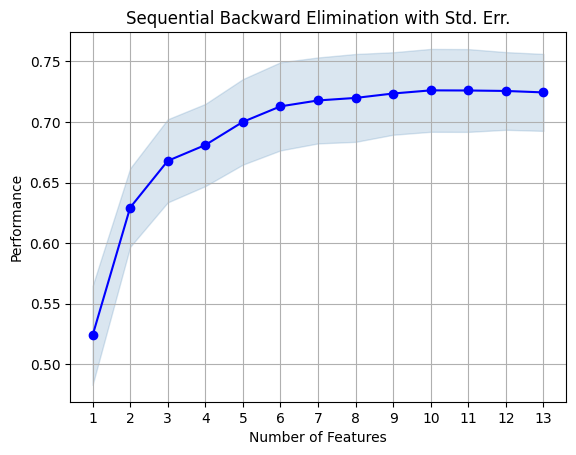

In [ ]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind= "std_err")
plt.title("Sequential Backward Elimination with Std. Err.")
plt.grid()
plt.show()

In [ ]:
x_train_sel = sfs.transform(x_train)
x_test_sel = sfs.transform(x_test)

In [ ]:
model = LinearRegression()

In [ ]:
print("Training: ", (np.mean(cross_val_score(model, x_train_sel, y_train, cv= 5, scoring= "r2"))))
print("Testing: ", (np.mean(cross_val_score(model, x_test_sel, y_test, cv= 5, scoring= "r2"))))

Training:  0.7261221606129598
Testing:  0.5246730606335527


#### Froward Selection

In [ ]:
lr = LinearRegression()

sfs = SFS(lr, k_features= "best", scoring= "r2", cv= 5, forward= True, floating= False)

In [ ]:
sfs.fit(x_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 13),
                          scoring='r2')

In [ ]:
sfs.feature_names

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'b',
 'lstat']

In [ ]:
metric = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

In [ ]:
metric

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(12,)","[0.4271362866520366, 0.5927086587043351, 0.567...",0.523798,"(lstat,)",0.104953,0.081657,0.040829
2,"(5, 12)","[0.6392367014361816, 0.5532060915883089, 0.682...",0.629351,"(rm, lstat)",0.083338,0.06484,0.03242
3,"(5, 10, 12)","[0.705483784332797, 0.5807832925979115, 0.6776...",0.667932,"(rm, ptratio, lstat)",0.088186,0.068612,0.034306
4,"(5, 10, 11, 12)","[0.7378036058092381, 0.5844120492108218, 0.675...",0.681383,"(rm, ptratio, b, lstat)",0.09243,0.071914,0.035957
5,"(5, 7, 10, 11, 12)","[0.7555271928014685, 0.6108537430892611, 0.708...",0.699202,"(rm, dis, ptratio, b, lstat)",0.088983,0.069232,0.034616
6,"(4, 5, 7, 10, 11, 12)","[0.7788452493110056, 0.6218554113167254, 0.720...",0.712919,"(nox, rm, dis, ptratio, b, lstat)",0.093501,0.072747,0.036374
7,"(3, 4, 5, 7, 10, 11, 12)","[0.7693061589941236, 0.6161051136591215, 0.733...",0.717804,"(chas, nox, rm, dis, ptratio, b, lstat)",0.091209,0.070964,0.035482
8,"(0, 3, 4, 5, 7, 10, 11, 12)","[0.7758510999506724, 0.615363489409088, 0.7400...",0.719883,"(crim, chas, nox, rm, dis, ptratio, b, lstat)",0.093221,0.072529,0.036265
9,"(0, 3, 4, 5, 7, 8, 10, 11, 12)","[0.7795789280495411, 0.6175447522819577, 0.749...",0.723533,"(crim, chas, nox, rm, dis, rad, ptratio, b, ls...",0.087503,0.06808,0.03404
10,"(0, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.788177428705694, 0.6205265408146727, 0.7552...",0.726122,"(crim, chas, nox, rm, dis, rad, tax, ptratio, ...",0.087944,0.068424,0.034212


In [ ]:
metric["observations"] = 404
metric["num_features"] = metric["feature_idx"].apply(lambda x: len(x))

In [ ]:
def adjust_r2(r2, observations, num_features):
    coef = (observations - 1) / (observations - num_features - 1)
    return 1 - (1 - r2) * coef

In [ ]:
metric["adjut_r2"] = adjust_r2(metric["avg_score"], metric["observations"], metric["num_features"])

In [ ]:
metric.sort_values("adjut_r2", ascending= False)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjut_r2
10,"(0, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.788177428705694, 0.6205265408146727, 0.7552...",0.726122,"(crim, chas, nox, rm, dis, rad, tax, ptratio, ...",0.087944,0.068424,0.034212,404,10,0.719153
11,"(0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7884547664556615, 0.6205822778720618, 0.753...",0.726015,"(crim, indus, chas, nox, rm, dis, rad, tax, pt...",0.087825,0.068331,0.034165,404,11,0.718327
9,"(0, 3, 4, 5, 7, 8, 10, 11, 12)","[0.7795789280495411, 0.6175447522819577, 0.749...",0.723533,"(crim, chas, nox, rm, dis, rad, ptratio, b, ls...",0.087503,0.06808,0.03404,404,9,0.717218
12,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7803845935030925, 0.6251539177074756, 0.759...",0.725636,"(crim, zn, indus, chas, nox, rm, dis, rad, tax...",0.082429,0.064133,0.032066,404,12,0.717216
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7750198245492361, 0.6242494504269509, 0.759...",0.724436,"(crim, zn, indus, chas, nox, rm, age, dis, rad...",0.081659,0.063534,0.031767,404,13,0.71525
8,"(0, 3, 4, 5, 7, 10, 11, 12)","[0.7758510999506724, 0.615363489409088, 0.7400...",0.719883,"(crim, chas, nox, rm, dis, ptratio, b, lstat)",0.093221,0.072529,0.036265,404,8,0.71421
7,"(3, 4, 5, 7, 10, 11, 12)","[0.7693061589941236, 0.6161051136591215, 0.733...",0.717804,"(chas, nox, rm, dis, ptratio, b, lstat)",0.091209,0.070964,0.035482,404,7,0.712816
6,"(4, 5, 7, 10, 11, 12)","[0.7788452493110056, 0.6218554113167254, 0.720...",0.712919,"(nox, rm, dis, ptratio, b, lstat)",0.093501,0.072747,0.036374,404,6,0.70858
5,"(5, 7, 10, 11, 12)","[0.7555271928014685, 0.6108537430892611, 0.708...",0.699202,"(rm, dis, ptratio, b, lstat)",0.088983,0.069232,0.034616,404,5,0.695423
4,"(5, 10, 11, 12)","[0.7378036058092381, 0.5844120492108218, 0.675...",0.681383,"(rm, ptratio, b, lstat)",0.09243,0.071914,0.035957,404,4,0.678189


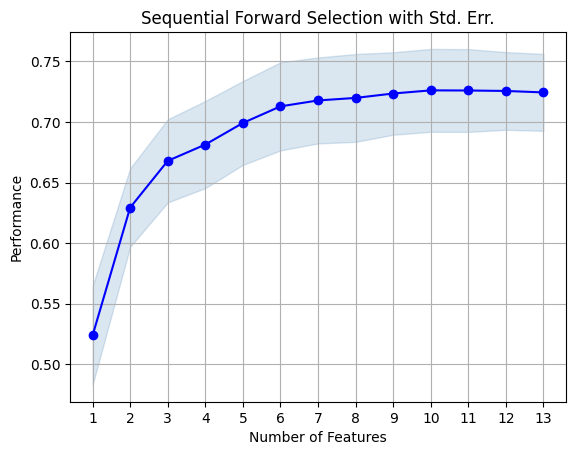

In [ ]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind= "std_err")
plt.title("Sequential Forward Selection with Std. Err.")
plt.grid()
plt.show()

In [ ]:
x_train_sel = sfs.transform(x_train)
x_test_sel = sfs.transform(x_test)

In [ ]:
model = LinearRegression()

print("Training: ", (np.mean(cross_val_score(model, x_train_sel, y_train, cv= 5, scoring= "r2"))))
print("Testing: ", (np.mean(cross_val_score(model, x_test_sel, y_test, cv= 5, scoring= "r2"))))

Training:  0.7261221606129598
Testing:  0.5246730606335527
